In [5]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

dataset = pd.read_csv('winequality-red.csv')

input = dataset.drop('quality', axis = 1) 
#Here we have split the decision variable into a binary attribute to convert it into a classification problem. Using LabelEncoder we have labelled values less than 5.5 as bad and above that as good wine.
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
dataset['quality'] = label_quality.fit_transform(dataset['quality'])
output = dataset['quality']



In [6]:
from sklearn import preprocessing

scaler = StandardScaler().fit(input)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

In [8]:
#Here we have designed a single hidden layer perceptron where the input dimension is 11 as because of the 11 inputs with a hidden layer of 20 neurons and an output layer for the class. As all the values of attributes are float we have decided to keep the inner activation relu and the sigmoid function as the activation from hidden to output layer. 
model = Sequential()
model.add(Dense(20, input_dim=11, init='uniform', activation='relu'))
#model.add(Dense(12, init='uniform', activation='relu'))
#model.add(Dense(12, init='uniform', activation='relu'))
#model.add(Dense(4, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist=model.fit(input, output, epochs=3500, batch_size=50, verbose=2,validation_split=0.2)

model.save('wine-model.h5')

.5622 - val_acc: 0.7531
Epoch 3274/3500
 - 0s - loss: 0.4671 - acc: 0.7709 - val_loss: 0.5664 - val_acc: 0.7500
Epoch 3275/3500
 - 0s - loss: 0.4641 - acc: 0.7764 - val_loss: 0.5690 - val_acc: 0.7594
Epoch 3276/3500
 - 0s - loss: 0.4711 - acc: 0.7740 - val_loss: 0.5774 - val_acc: 0.7625
Epoch 3277/3500
 - 0s - loss: 0.4678 - acc: 0.7748 - val_loss: 0.5528 - val_acc: 0.7531
Epoch 3278/3500
 - 0s - loss: 0.4640 - acc: 0.7686 - val_loss: 0.5658 - val_acc: 0.7563
Epoch 3279/3500
 - 0s - loss: 0.4669 - acc: 0.7740 - val_loss: 0.5812 - val_acc: 0.7281
Epoch 3280/3500
 - 0s - loss: 0.4655 - acc: 0.7733 - val_loss: 0.5632 - val_acc: 0.7469
Epoch 3281/3500
 - 0s - loss: 0.4654 - acc: 0.7780 - val_loss: 0.5534 - val_acc: 0.7500
Epoch 3282/3500
 - 0s - loss: 0.4665 - acc: 0.7740 - val_loss: 0.5660 - val_acc: 0.7625
Epoch 3283/3500
 - 0s - loss: 0.4715 - acc: 0.7608 - val_loss: 0.5613 - val_acc: 0.7469
Epoch 3284/3500
 - 0s - loss: 0.4657 - acc: 0.7748 - val_loss: 0.5574 - val_acc: 0.7531
Epoch 32

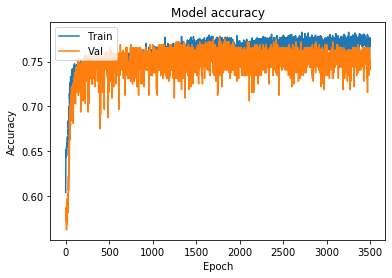

In [9]:
#The number of epochs is kept at 3500 as the validaition accuracy tends to decrease after 4000 epochs indicating overfitting.
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

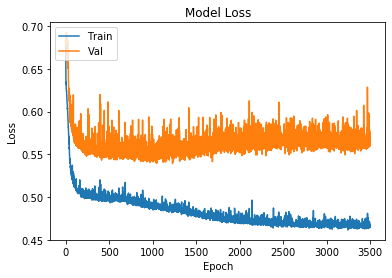

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [17]:
#As the perceptron gives output between 0 and 1 we round it of to give 0 for class 'bad' and 1 for 'good'. The model accuracy is 76% better than the decision tree classifier but less than RandomForest but more than NaiveBayes.
from sklearn.metrics import classification_report, confusion_matrix
pred=model.predict(X_test)
print(classification_report(y_test,pred.round()))
print(confusion_matrix(y_test,pred.round()))

precision    recall  f1-score   support

           0       0.71      0.74      0.73       141
           1       0.79      0.77      0.78       179

    accuracy                           0.76       320
   macro avg       0.75      0.76      0.75       320
weighted avg       0.76      0.76      0.76       320

[[105  36]
 [ 42 137]]
